<a href="https://colab.research.google.com/github/BeeramVineethReddy/Geno_Intern/blob/master/getting_json_and_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2, os, json
from matplotlib import pyplot as plt
import numpy as np

files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('png')]
files

['x29y60.png',
 'x32y17.png',
 'x27y51.png',
 'x43y15.png',
 'x34y14.png',
 'x42y30.png',
 'x30y56.png',
 'x28y58.png',
 'x100y100.png']

In [44]:
def DFS(arr,visited,tmp,i,j,r,c):
  tmp.append([i,j])
  visited[i][j]=True
  if(j-1 in range(0,c) and visited[i][j-1]==False and arr[i][j-1]!=0):
    DFS(arr,visited,tmp,i,j-1,r,c)
  if(j+1 in range(0,c) and visited[i][j+1]==False and arr[i][j+1]!=0):
    DFS(arr,visited,tmp,i,j+1,r,c)
  if(i-1 in range(0,r) and visited[i-1][j]==False and arr[i-1][j]!=0):
    DFS(arr,visited,tmp,i-1,j,r,c)
  if(i+1 in range(0,r) and visited[i+1][j]==False and arr[i+1][j]!=0):
    DFS(arr,visited,tmp,i+1,j,r,c)
  
  if(j-1 in range(0,c) and i+1 in range(0,r) and visited[i+1][j-1]==False and arr[i+1][j-1]!=0):
    DFS(arr,visited,tmp,i+1,j-1,r,c)
  if(j-1 in range(0,c) and i-1 in range(0,r) and visited[i-1][j-1]==False and arr[i-1][j-1]!=0):
    DFS(arr,visited,tmp,i-1,j-1,r,c)
  if(j+1 in range(0,c) and i+1 in range(0,r) and visited[i+1][j+1]==False and arr[i+1][j+1]!=0):
    DFS(arr,visited,tmp,i+1,j+1,r,c)
  if(j+1 in range(0,c) and i-1 in range(0,r) and visited[i-1][j+1]==False and arr[i-1][j+1]!=0):
    DFS(arr,visited,tmp,i-1,j+1,r,c)




def get_json_object(path):
    img = cv2.imread(path)
    edges = cv2.Canny(img,1,10)
    arr = np.array(edges)
    #print(arr)
    shape = np.shape(arr)
    #print(shape)
    row, col = shape[0],shape[1]
    visited = [[False for x in range(col)] for y in range(row)]
    ans = []
    for i in range(row):
        for j in range(col):
            if visited[i][j]==False:
                if(arr[i][j]!=0):
                    t=[]
                    DFS(arr,visited,t,i,j,row,col)
                    ans.append(t)
                else:
                    visited[i][j]=True
    json = {}

    json["elements"] = []
    for lst in ans:
        json["elements"].append( { "pixel": lst })
    json["name"] = path
    json["position"] = []
    json["position"].append(path[1:path.index('y')])
    json["position"].append(path[path.index('y')+1:path.index('.')])
    return json

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x29y60.png


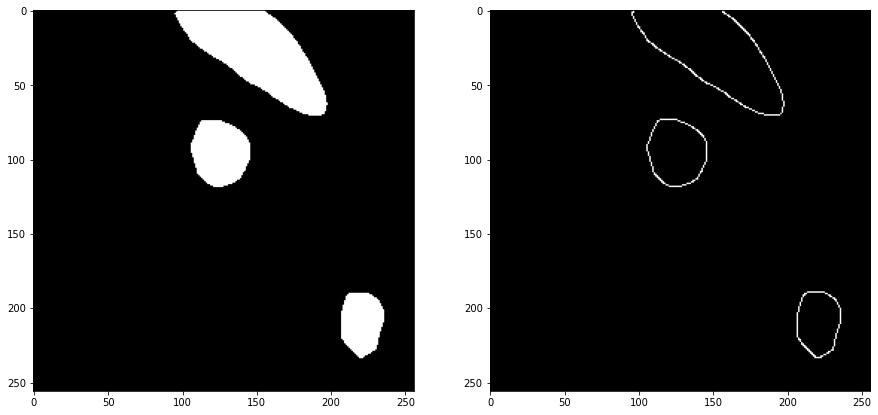

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x32y17.png


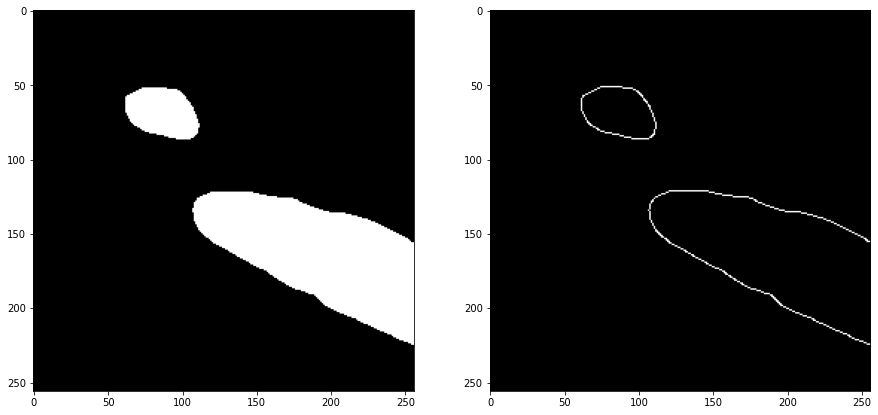

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x27y51.png


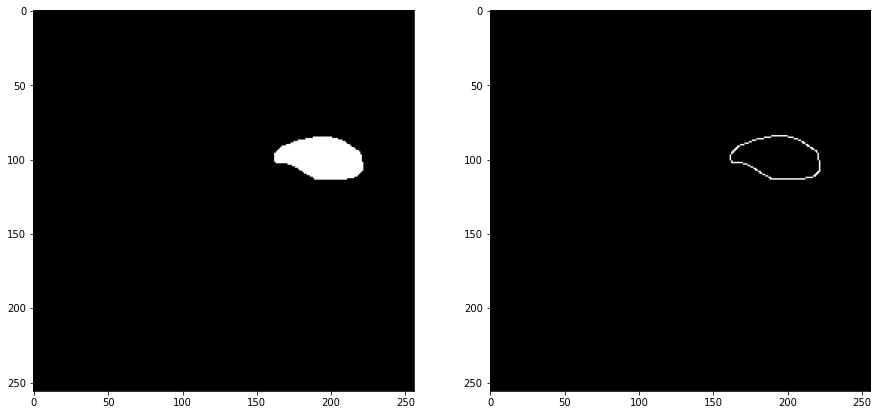

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x43y15.png


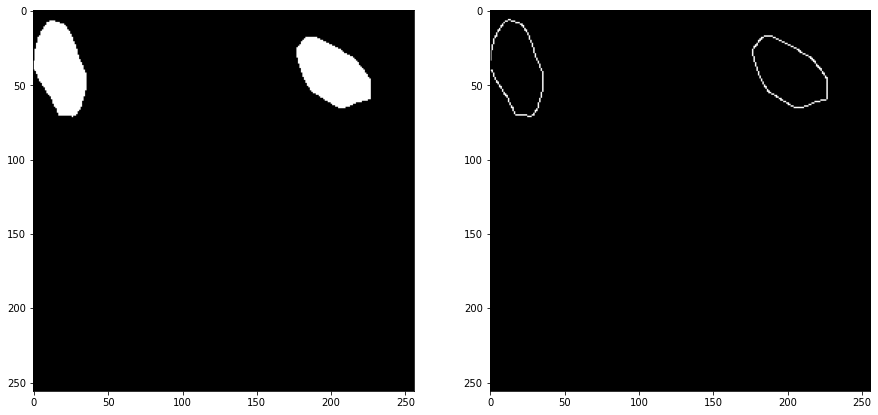

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x34y14.png


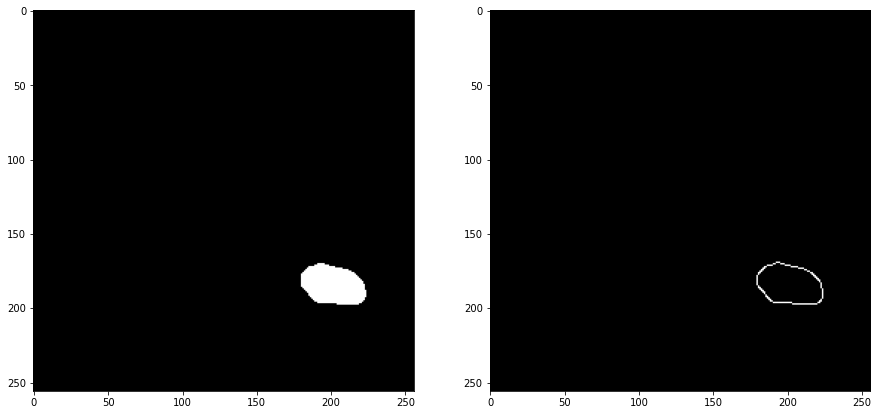

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x42y30.png


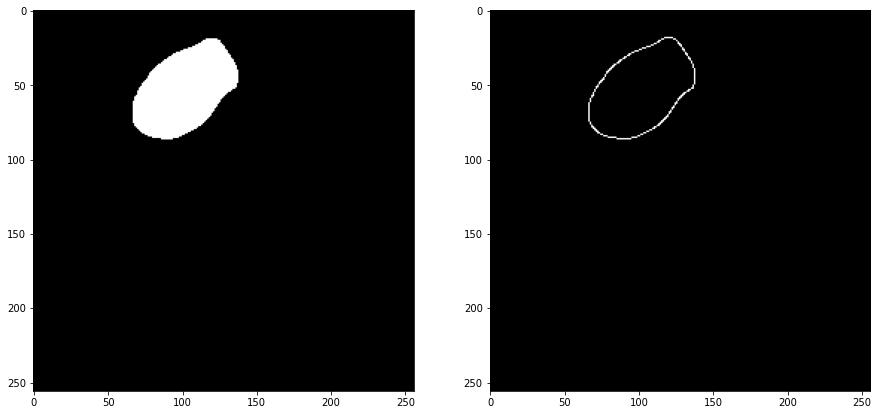

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x30y56.png


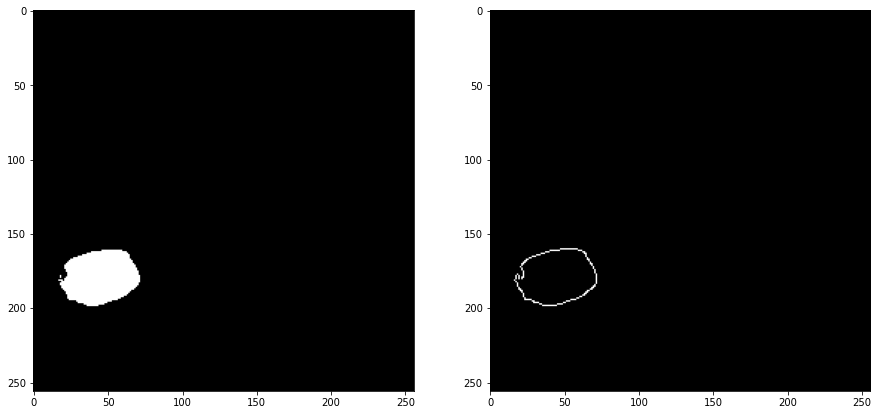

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x28y58.png


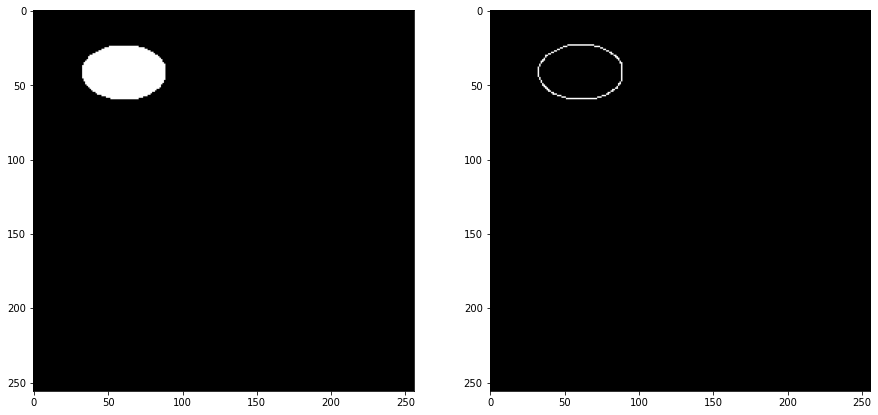

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x100y100.png


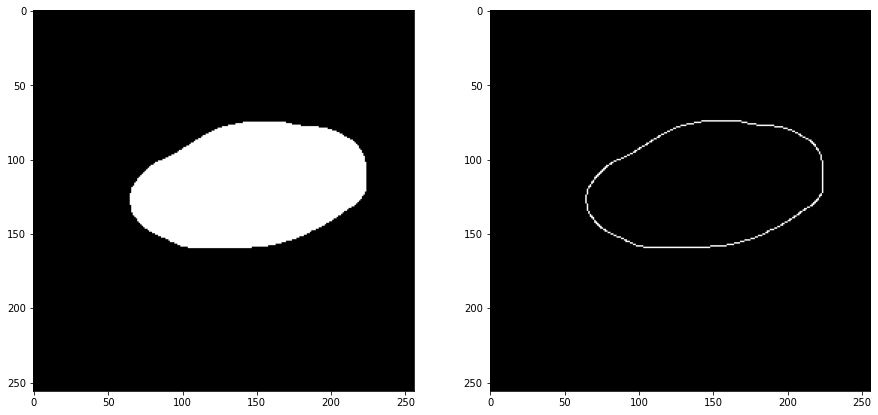

In [45]:
ans = []
for f in files:
  d = get_json_object(f)
  with open(f[:-3]+'json', "w") as outfile: 
    json.dump(d, outfile)
  img = cv2.imread(str(f))
  arr = np.array(img)
  shape = np.shape(arr)
  recon = np.zeros((shape[0],shape[1],3))
  for each in d["elements"]:
    for pt in each["pixel"]:
      recon[pt[0]][pt[1]] = [255,255,255]
  print(str(f))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
  ax1.imshow(img)
  ax2.imshow(recon)
  plt.show()
  ans.append(d)

In [30]:
len(ans)

8